In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import timeit

def isGoal(x):
    for i in range(x.shape[0]-1):
        for j in range(i+1,x.shape[0]):
            if x[i]==x[j]:
                #print("Column Conflict "+str(i)+" "+str(j))
                return False
               
            if abs(i-j) == abs(x[i]-x[j]):
                #print("Diagonal Conflict "+str(i)+" "+str(j))
                return False
              
    return True

In [2]:
def generateRandomly(n):
    x=np.zeros(n)
    for i in range(x.shape[0]):
        x[i]=random.randint(0,n-1)
    return x


In [3]:

def MonteCarlo(n,maxIter):
    monteQuality=[]
    time=[]
    for i in range(maxIter):
        start = timeit.default_timer()
        s=generateRandomly(n)
        q1=quality(s)
        monteQuality.append(q1)
        if isGoal(s):
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return s,i,monteQuality,time
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)  
      
    return "Failure",i,monteQuality,time
    


In [4]:
import copy
def generateRandomNeighbor(s):
    sprime=copy.deepcopy(s)
    # make some random changes in s
    sprime[random.randint(0,s.shape[0]-1)]=random.randint(0,s.shape[0]-1)
    return sprime

#generateRandomNeighbor(np.array([0,1,2,3]))

In [5]:
def RandomNeighborSearch(n,maxIter):
    s = generateRandomly(n)
    gibbsQuality=[]
    time=[]
    if isGoal(s):
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
        return s
    for i in range(maxIter):
        start = timeit.default_timer()
        sprime = generateRandomNeighbor(s)
        q1=quality(sprime)
        gibbsQuality.append(q1)
        if isGoal(sprime):
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return sprime,i,gibbsQuality,time
        else:
            s=sprime
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
   
    return "Failure",i,gibbsQuality,time


In [6]:
def quality(x):
    count=0
    for i in range(x.shape[0]-1):
        for j in range(i+1,x.shape[0]):
            if x[i]==x[j]:
                count=count+1
            if abs(i-j) == abs(x[i]-x[j]):
                count=count+1
    return count

In [7]:
def HillDescent(n,maxIter):
    s = generateRandomly(n)
    hillQuality=[]
    time=[]
    if isGoal(s):
        start = timeit.default_timer()
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
        return s
    for i in range(maxIter):
       
        start = timeit.default_timer()        
        sprime = generateRandomNeighbor(s)
        q1=quality(sprime)
        q2=quality(s)
        hillQuality.append(q2)
        if isGoal(sprime):
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return sprime,i,hillQuality,time
        elif q1<=q2:
            s=sprime
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)

    return "Failure",i,hillQuality,time



In [8]:
def HillBad(n,maxIter):
    s = generateRandomly(n)
    hillBadQuality=[]
    wp=.1
    time=[]
    #stop=0.00000001
    if isGoal(s):
        if i==0:
            start = timeit.default_timer()
        else:
            start = stop
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
        return s
    for i in range(maxIter):
        start = timeit.default_timer()
        sprime = generateRandomNeighbor(s)
        q1=quality(sprime)
        q2=quality(s)
        hillBadQuality.append(q2)
        if isGoal(sprime):
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return sprime,i,hillBadQuality,time
        elif q1<=q2:
            s=sprime
        elif random.uniform(0.0,1.0)<=wp:
            s=sprime
        
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
    return "Failure",i,hillBadQuality,time


In [9]:
def SimmulatedAnnealing(n,maxIter):
    s = generateRandomly(n)
    simmulatedQuality=[]
    T=100000
    t_min=1
    time=[]
    if isGoal(s):
        start = timeit.default_timer()
        stop = timeit.default_timer()
        t=stop-start
        time.append(t)
        return s
    for i in range(maxIter):
        start = timeit.default_timer()
        sprime = generateRandomNeighbor(s)
        q1=quality(sprime)
        q2=quality(s)
        simmulatedQuality.append(q2)
        if isGoal(sprime):
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return sprime,i,simmulatedQuality
        elif q1<=q2:
            s=sprime
        elif T>=t_min and random.uniform(0.0,1.0)>=math.exp(-(q2-q1)/T):
            s=sprime
            T=T-1
            
    stop = timeit.default_timer()
    t=stop-start
    time.append(t)
    return "Failure",i,simmulatedQuality

In [10]:
def populationBasedSearch(n,maxGen,populationSize):
    # initialization
    P=[]
    populationQuality=[]
    time=[]
    for i in range(populationSize):
        P.append(generateRandomly(n))
    for s in P:
        if isGoal(s):
            start = timeit.default_timer()
            stop = timeit.default_timer()
            t=stop-start
            time.append(t)
            return s
    
    # now start the algorithm
    for i in range(maxGen):
        Pprime=[]
        start = timeit.default_timer()
        # now we have to populate Pprime using P
        for s in P:
            sprime=generateRandomNeighbor(s)
            q1=quality(sprime)
            q2=quality(s)
            if q1 <= q2:
                Pprime.append(sprime)
            else:
                Pprime.append(s)
                
        populationQuality.append(q2)
        P=Pprime    
        for s in P:
            if isGoal(s):
                stop = timeit.default_timer()
                t=stop-start
                time.append(t)
                return s,i,populationQuality
    start = timeit.default_timer()
    stop = timeit.default_timer()
    t=stop-start
    time.append(t)
    return "Failure",i,populationQuality
#populationBasedSearch(7,100,10)

In [11]:
def CrossOver(p1,p2):
    c1=copy.deepcopy(p1)
    c2=copy.deepcopy(p2)
    crossoverPoint=random.randint(1,p1.shape[0]-1)
    #print(crossoverPoint)
    for i in range(crossoverPoint,p1.shape[0]):
        c1[i]=p2[i]
        c2[i]=p1[i]
    return c1,c2
    
#p1=generateRandomly(6)
#p2=generateRandomly(6)
#print(p1)
#print(p2)

#CrossOver(p1,p2)

In [12]:
def GeneticAlgorithm(n,maxGen,populationSize):
    # initialization
    P=[]
    for i in range(populationSize):
        P.append(generateRandomly(n))
    for s in P:
        if isGoal(s):
            return s
    
    Pprime=[]
    Pprime=copy.deepcopy(P)
    p1=[]
    half=int(populationSize/2)
    a=0
    b=1
    CrossOver(Pprime[0],Pprime[1])
    for j in range(half):
        a1=Pprime[a]
        b1=Pprime[b]
       # p1.append(CrossOver(Pprime[a],Pprime[b]))
        c1,c2=CrossOver(a1,b1)
        p1.append(c1)
        p1.append(c2)
        a=a+2
        b=b+2
    
    
    Pprime=Pprime+p1
  
    P2prime=[]
     # now start the algorithm
  
        # now we have to populate Pprime using P
    for s in Pprime:
        sprime=generateRandomNeighbor(s)
        q1=quality(sprime)
        q2=quality(s)
        if q1 <= q2:
            P2prime.append(sprime)
        else:
            P2prime.append(s)    
                
    Pprime=Pprime+P2prime
    
    for i in range(len(Pprime)):
        for j in range(len(Pprime)):
            if quality(Pprime[i])<=quality(Pprime[j]):
                temp=Pprime[i]
                Pprime[i]=Pprime[j]
                Pprime[j]=temp
     
    Pprime=Pprime[:10]
    geneticQuality=[]
    for i in range(maxGen):
        final=[]
        # now we have to populate Pprime using P
        for s in Pprime:
            sprime=generateRandomNeighbor(s)
            q1=quality(sprime)
            q2=quality(s)
            if q1 <= q2:
                final.append(sprime)
            else:
                final.append(s)
                
        geneticQuality.append(q2)
        Pprime=final    
        for s in Pprime:
            if isGoal(s):
                return s,i,geneticQuality
               
   # print("After after : \n",Pprime)
    
   # for i in range(len(Pprime)):
    #    print(quality(Pprime[i]))
        
    return "Failure",i,geneticQuality
     
    
    
  #hi kitkat :D how r yuo?
#print(s)

Monte Carlo = Result: Failure , Iterations : 999
Gibbs = Result: Failure , Iterations : 999
Hill Climbing = Result: Failure , Iterations : 999
Hill Climbing Bad Steps = Result: Failure , Iterations : 999
SImmulated Annealing = Result: [5. 7. 0. 4. 6. 1. 9. 2. 8. 3.] , Iterations : 342
Population Based Search = Result: [2. 4. 8. 1. 9. 6. 3. 0. 7. 5.] , Iterations : 218
Genetic Algo Search = Result: [5. 7. 2. 6. 3. 9. 0. 8. 4. 1.] , Iterations : 145


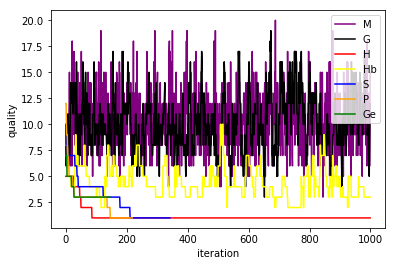

In [13]:
iteration=1000
arraySize=10

monteArr,monteIter,monteQuality,Mtime=MonteCarlo(arraySize,iteration)
gibbsArr,gibbsIter,gibbsQuality,Gtime=RandomNeighborSearch(arraySize,iteration)
hillArr,hillIter,hillQuality,Htime=HillDescent(arraySize,iteration)
hillBadArr,hillBadIter,hillBadQuality,Hbtime=HillBad(arraySize,iteration)
simmulatedArr,simmulatedIter,simmulatedQuality=SimmulatedAnnealing(arraySize,iteration)
populationArr,populationIter,populationQuality=populationBasedSearch(arraySize,iteration,10)
geneticArr,geneticIter,geneticQuality=GeneticAlgorithm(arraySize,iteration,10)

print("Monte Carlo =","Result:",monteArr,", Iterations :",monteIter)
print("Gibbs =","Result:",gibbsArr,", Iterations :",gibbsIter)
print("Hill Climbing =","Result:",hillArr,", Iterations :",hillIter)
print("Hill Climbing Bad Steps =","Result:",hillBadArr,", Iterations :",hillBadIter)
print("SImmulated Annealing =","Result:",simmulatedArr,", Iterations :",simmulatedIter)
print("Population Based Search =","Result:",populationArr,", Iterations :",populationIter)
print("Genetic Algo Search =","Result:",geneticArr,", Iterations :",geneticIter)


plt.plot([i for i in range(monteIter+1)],monteQuality,color='purple')
plt.plot([i for i in range(gibbsIter+1)],gibbsQuality,color='black')
plt.plot([i for i in range(hillIter+1)],hillQuality,color='red')
plt.plot([i for i in range(hillBadIter+1)],hillBadQuality,color='yellow')
plt.plot([i for i in range(simmulatedIter+1)],simmulatedQuality,color='blue')
plt.plot([i for i in range(populationIter+1)],populationQuality,color='orange')
plt.plot([i for i in range(geneticIter+1)],geneticQuality,color='green')

plt.xlabel("iteration")
plt.ylabel("quality")
plt.legend(('M', 'G', 'H','Hb','S','P','Ge'))
plt.show()



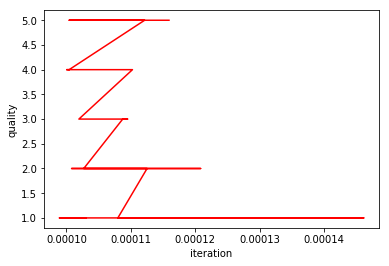

In [15]:
#plt.plot(Mtime,monteQuality,color='purple')
#plt.plot(Gtime,gibbsQuality,color='black')
plt.plot(Htime,hillQuality,color='red')
#plt.plot(Hbtime,hillBadQuality,color='yellow')


plt.xlabel("iteration")
plt.ylabel("quality")
#plt.legend(('M', 'G', 'H','Hb','S','P','Ge'))
plt.show()
